# Solar Spectrum Lab

Deryl Long

## Abstract

The goal of this lab is to gather and understand the spectrum of the sun. In order to accomplish this, we must take data for the solar spectrum, using the Angell Hall telescope and spectrometer, as well as data for a calibration spectrum. For the purposes of this lab, we used the spectrum of a neon lamp to calibrate our wavelengths/pixel values, as this spectrum has many noticeable lines. We utilize our data for the neon lamp to determine a conversion between pixel values and wavelengths. This calibration then allows us to properly plot our solar spectrum and determine clear lines of absorption. Ultimately, this calibrated solar spectrum allows us to understand some elements of the composition of the sun.

## Introduction

Spectroscopy is a critical method of understanding composition and dynamics of various astronomical objects. For example, astronomers can use spectroscopy to analyze the atmospheric composition of an exoplanet, or to determine the redshifted velocity of a galaxy moving away from us. Spectroscopy is the method of essentially dispersing the light from an object into a useful spectrum that gives us lots of interesting information. Astronomers have made use of this method since the 1800s, when it was first used to study the absorption lines of the sun. 

It is valuable for astronomers to be able to study the composition of stars, such as the sun, because we can determine which elements are prevalent in the universe, as well as their abundances. With this critical information, we see which elements are created in stars, or elsewhere, and can better understand and categorize stars. Further, spectroscopy offers a method of understanding the atmospheres of distant exoplanets, ultimately aiding in the search for possibly habitable planets. There are many uses for the method of spectroscopy, and we will explore and demonstrate one of those many uses by understanding the solar spectrum through our experiments.

## Theory

#### Spectral Dispersion

Spectral dispersion can be understood as the wavelength range given by a spectrograph. Dispersion varies for different dispersers, such as prisms or gratings. Spectral dispersion for a grating is set by the deviation angle $ \beta $ , the order m, and the groove spacing d. These properties are all related by the following equation, which gives constant dispersion for given groove spacing and order:

$$ Angular \; Dispersion = \frac{d\beta}{d\lambda}= \frac {m}{dcos(\beta)} $$

#### Calibration 

In order to determine the wavelength scale for a given spectrum, one can use a calibration lamp. A calibration lamp utilizes our knowledge of given elements and their distinctive emission lines to determine a conversion between pixel value and wavelength number. For example, if one knows the wavelength values for lines in Neon's spectrum, then one can take a spectrum of a neon lamp with the same spectrogrpah used for an experiment and use this to find the conversion factors. 

Calibration lamps are very valuable, because they allow you to understand the wavelength range/spectral dispersion for a spectrograph that you may have no information on. This method allows astronomers to quickly understand where the lines of emission or absorption lie on any given spectrum via comparison and conversion. 

#### Stellar Absorption Lines

The strength of a stellar absorption line gives the total absorption associated with the line, and is dependent on the temperature of the star. There is not a very clear relationship between line strength and abundance, so astronomers most often correlate strength and temperature. Line intensity S is given the form of an integral of the absortion coefficient over frequency:

$$ S = \int k_{a,v} dv $$

Based on line strength's dependency on stellar surface temperature, we understand that the strongest features in a stellar absorption spectrum are not always those with the highest abundance. 

## Methodology 

In the first portion of our experiment, we must determine a conversion factor from pixel value to wavelength. We accomplish this by using a Neon calibration lamp. 

In [15]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
rc('figure', figsize=(12.0, 9.0))

#import 20 bias frames 
bias = []
for i in range(1,10):
    bias.append(fits.getdata("biasBias0000000{}.fit".format(i) , ext=0).astype(np.int))
for i in range(10,21):
    bias.append(fits.getdata("biasBias000000{}.fit".format(i) , ext=0).astype(np.int))



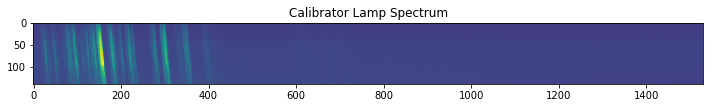

In [16]:
#import lamp frames: lamp and background 60 second exposure time

lamp = []
for i in range(1,4): #3 lamp frames, 60s
    lamp.append(fits.getdata("lampSGSNoTarget0000000{}.fit".format(i) , ext=0).astype(np.int))
    
lamp_back = []
for i in range(1,4): #3 lamp background frames, 60s
    lamp_back.append(fits.getdata("backSGSNoTarget0000000{}.fit".format(i), ext=0).astype(np.int))
    
total_lamp = sum(lamp)
total_back = sum(lamp_back)
    
corrected_lamp = total_lamp - total_back #gives final array of corrected lamp values after subtracting all background frames


cut_lamp = corrected_lamp[:140, ::-1]

plt.imshow(cut_lamp)
plt.title("Calibrator Lamp Spectrum")
plt.show()       

The calibrator lamp image shown above has been corrected via the subraction of a mean background frame. This process effectively removes the noise asociated with bias frames and dark frames. The relative brightness of the lines varies somewhat, correlating to a variation in the intensity of emission for different lines in Neon's spectrum. 

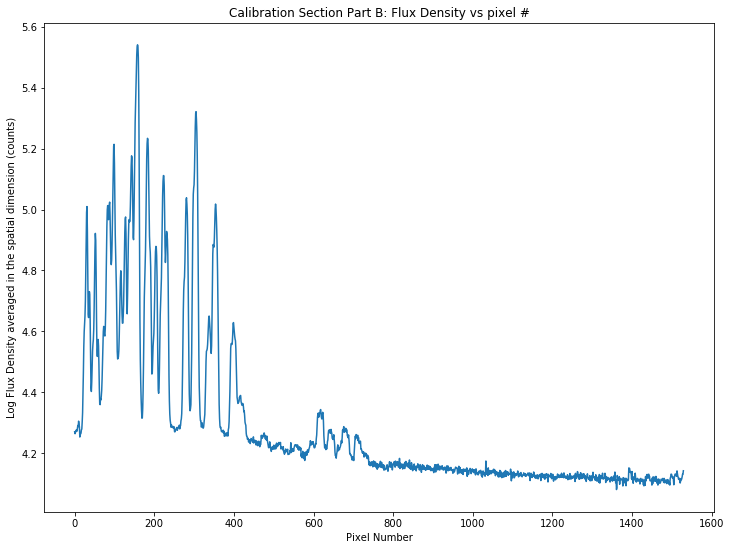

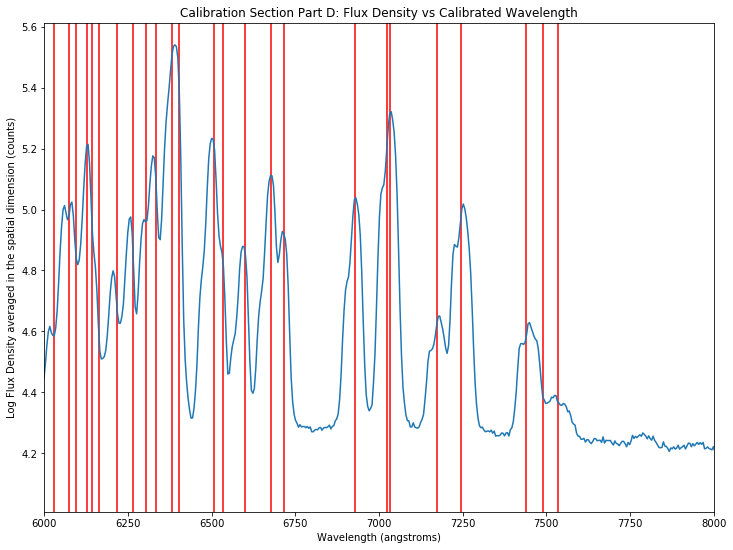

In [17]:
#try to flatten to one row for all columns

#first separate out the actual spectrum portion at any given row here -> this is a starting point

sum_row = corrected_lamp[80, ::-1]

#need to get average over all rows

for i in range(80, 105):
    sum_row += corrected_lamp[i, ::-1]

col_num = len(sum_row)

#convert pixel dimension to wavelength
lamp_col_orig = (np.arange(col_num))
lamp_col = (np.arange(col_num)+1296)*4.395

#actual wavelength values for neon emission lines
angst=np.array([
        6029.9971,
        6074.3377,
        6096.1631,
        6128.4499,
        6143.0626,
        6163.5939,
        6217.2812,
        6266.495, 
        6304.789, 
        6334.4278,
        6382.9917,
        6402.246, 
        6506.5281,
        6532.8822,
        6598.9529,
        6678.2764,
        6717.043, 
        6929.4673,
        7024.0504,
        7032.4131,
        7173.9381,
        7245.1666,
        7438.899,
        7488.8712,
        7535.7739,
        8136.405])

plt.plot(lamp_col_orig,np.log10(sum_row))
plt.title("Calibration Section Part B: Flux Density vs pixel #")
plt.ylabel("Log Flux Density averaged in the spatial dimension (counts)")
plt.xlabel("Pixel Number")
plt.show()


#plotting actual neon data lines to try and match up
for col in angst:
    plt.axvline(col, color='r')    


    
#plotting log of flux density (sum over 10 rows) by wavelength pixel dimension 
plt.plot(lamp_col,np.log10(sum_row))
plt.xlim(6000,8000)
plt.title("Calibration Section Part D: Flux Density vs Calibrated Wavelength")
plt.ylabel("Log Flux Density averaged in the spatial dimension (counts)")
plt.xlabel("Wavelength (angstroms)")
plt.show()

#scale factor that worked: shift +1296, stretch 4.395 
#this result is our calibrated spectrum plot 

We are able to match some clear features of the known Neon emission spectrum to our experimental spectrum. For example, we see that the line for NeI at 6506 angstroms correlates to a pixel value of about 184, and that the side-by-side lines at 7051 and 7059 angstroms correlate to pixel values of 308 and 310, respectively. By matching up these lines we see that a stretch factor of 4.395 and a shift of +1296 gives us a very good overlay of known lines and peaks in our experimental spectrum!

We now move forward to the second half of our experiment, in which we apply the conversion factor from our calibration to the actual stelar spectrum. In doing so, we can see the true wavelengths at which absorption lines occur!

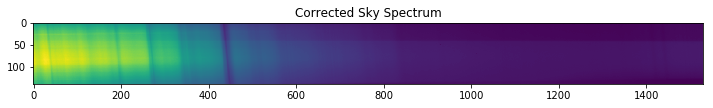

In [18]:
#import sky frames: sky and dark 10 second exposure time

sky = []
for i in range(1,6): #5 sky frames, 10s
    sky.append(fits.getdata("skySGSNoTarget0000000{}.fit".format(i) , ext=0).astype(np.int))
    
dark = []
for i in range(1,6): #5 dark frames, 60s
    dark.append(fits.getdata("darkDark0000000{}.fit".format(i) , ext=0).astype(np.int))

total_sky = sum(sky)
total_dark = sum(dark)
    
corrected_sky = total_sky - total_dark #gives final array oof corrected lamp values after subtracting all background frames

cut_sky = corrected_sky[:140, ::-1]

plt.imshow(cut_sky)
plt.title("Corrected Sky Spectrum")
plt.show() 


In the above image of our solar spectrum, we can identify some clear absorption lines where there is less intensity. In a plot of flux density, these lines should be easily identified as "dips". We see that some absorption lines are broader than others. This can be a result of thermal or doppler broadening. All of the lines we observe are absorption lines, as we are viewing a hot source (the sun) through a cooler source (the photosphere of the sun), thus we see the absorption lines due to elements within the sun.  


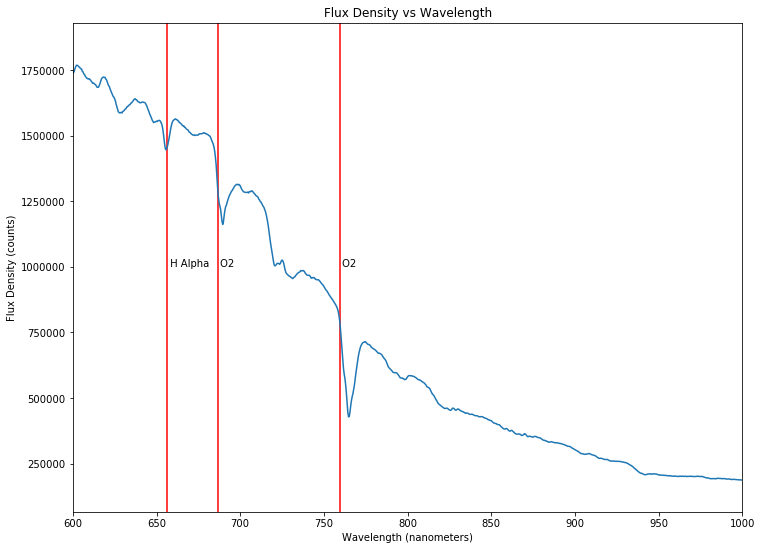

In [19]:
#Now repeat for the sky since the scale is right!!!!

#try to flatten to one row for all columns
#first separate out the actual spectrum portion at any given row here -> this is a starting point

sky_sum_row = corrected_sky[80, ::-1]

#need to get average over all rows

for i in range(80, 105):
    sky_sum_row += corrected_sky[i, ::-1]

sky_col_num = len(sky_sum_row)

#convert pixel dimension to wavelength
sky_col = (np.arange(sky_col_num)+1296)*.4395


#known fraunhofer lines!!! create array and plot to see correlation on our spectrum
fraun = np.array([656.281, 686.719, 759.37]) #lines for H alpha, O2 and O2 

for nano in fraun:
    plt.axvline(nano, color='r') 
    
#plotting log of flux density (sum over 10 rows) by wavelength in angstroms 
plt.plot(sky_col,(sky_sum_row))

plt.xlim(600,1000)
plt.title("Flux Density vs Wavelength")
plt.ylabel("Flux Density (counts)")
plt.xlabel("Wavelength (nanometers)")

plt.annotate(' H Alpha', xy=(656,1e6))
plt.annotate(' O2', xy=(686,1e6))
plt.annotate(' O2', xy=(759,1e6))

#NOTE: i've had some trouble with this plot. I think that for some reason, it sums up more and more flux if it is run over and over again. 
#So, if it doesn't plot when you run it- please restart the kernal and run all & it will work!

We see that the relative depths of the absorption lines for H alpha at 656 nm, O2 at 686 and 759 nm are all fairly similar to the depths we see in the solar spectrum we are consulting. While fairly close, the lines are not exact, particularly the line at 759 nm. Since line strength is related to the associated flux at that wavelength, we can infer that the errors in depth are likely due to some errors in our data-taking that obscured the intensity that we saw. We did subract dark frames from our solar spectrum data, but were unable to subract background frames. For this reason, we may have had some extra noise effecting our flux values. 

The H-alpha line is a noteable absorption feature, as it is one of the Balmer lines. The Balmer series of lines are characterized by a transitioning electron. For H-alpha, the electron transitions from n=3 to n=2. The Balmer series is very common in all stars, and many other celestial objects, making them particularly useful in classifying stars based on relative strength of spectral lines (ie surface temperature). Balmer lines are also often used to study radial velocity via their doppler shifts. 

Note that our matched lines are not exactly on top of our absorption features on the above plot. We infer that this slight offset is a result of our "slanted" absorption lines in the spectral image we took. 

## Summary

Our experiment required several steps. We took three images of the neon lamp spectrum and averaged them, subtracting away a mean background frame (comprised of three frames), which should help to remove noise of bias and dark frames in one step. After correcting the lamp spectrum, we performed a calibration by matching clear emission features to known emission lines from Neon's spectrum. This process ultimately resulted in a conversion factor, in terms of shift and stretch, that we could use to convert pixel values to wavelength values. 

Using the determined conversion factor, we were then able to produce a spectrum of the sun in terms of wavelength in nanometers. Note that we chose to correct our mean sky frame. produced from five sky frames, using a mean dark frame, produced from five dark frames. This correction removed dark current from our measurements, but does not necessarily eliminate read-noise or background noise. 

From the final solar spectrum, we were able to determine several key absorption features of the sun, and confirmed them by comparing to a known solar spectrum. The features we've identified here are H-alpa and two lines of diatomic oxygen. 

## Conclusion

Ultimately, our experiments provide us with a clear method through which to determine a conversion from pixels to wavelength, given a calibration spectrum from the same spectrograph. Further, we demonstrate that this calibration and conversion can be employed to produce useful spectra of any other object found using that spectrograph. For our purposes, we've anaylzed a spectrum of the sun. We are able to identify a few important absorption features- H-alpa, and diatomic oxygen. These features are important because they allow astronomers to classify our star! H-alpha in particular is useful because it is found in all stars, so it provides a good baseline for spectral classification. 